# Сенс динамічних рівнянь

Для любого момента времени $t$ при очень малом е можно с достаточно хорошей 
точностью найти положение в момент $t + \varepsilon$ 
через скорость и положение в момент $t$:

\begin{equation}
  x(t + \varepsilon) = x(t) + \varepsilon v_x
\end{equation}

Звісно, цей вираз тим точніший, чим менше $ \varepsilon $ , але він 
може бути досить точним, навіть коли інтервал $ \varepsilon $ не 
зникаюче малий. Що тепер можна сказати про швидкість? Щоб 
визначити швидкість у момент $ t + \varepsilon $, очевидно, потрібно знати, 
як вона змінюється з часом, тобто потрібно знати прискорення. 
А як дізнатися його? Ось тут-το нам на допомогу приходять 
рівняння динаміки. Саме вони дають змогу визначити, чому 
дорівнює прискорення:

\begin{equation}
  v_x(t + \varepsilon) = v_x(t) + \varepsilon a_x
\end{equation}


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import display, clear_output

## Задаємо початкові умови

In [2]:
v_x = 0
v_y = 1.63
x = 0.5
y = 0
t = 0


## Другий закон Ньютона

In [3]:
def a(x, y):
    r = (x**2 + y**2) ** 0.5
    a_x = -x / r**3
    a_y = -y / r**3
    return a_x, a_y


In [4]:
epsilon = 1e-2
matrix = np.empty((0, 7))

## Алгоритм розрахунку

In [5]:
for i in range(0, 450, 1):
    a_x, a_y = a(x, y)

    new_row = np.array([t, x, v_x, a_x, y, v_y, a_y])
    matrix = np.vstack([matrix, new_row])
    v_x += epsilon * a_x
    x += epsilon * v_x
    v_y += epsilon * a_y
    y += epsilon * v_y
    t += epsilon

t_values = matrix[:, 0]
x_values = matrix[:, 1]
y_values = matrix[:, 4]

## Побудова траєкторій

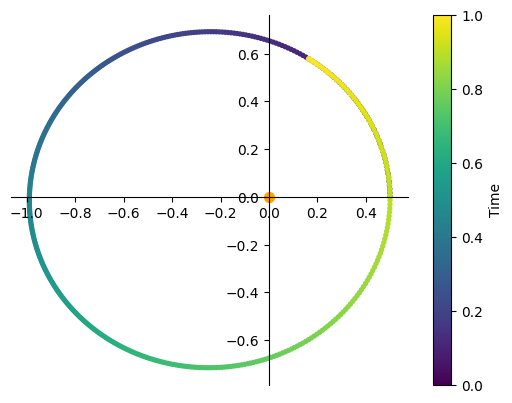

In [6]:
point_sizes = np.linspace(10, 50, len(t_values))

plt.scatter(x_values, y_values, s=8, c=t_values, cmap="viridis")

plt.scatter(0, 0, s=50, c="orange")

# Додаємо колірну шкалу
plt.colorbar(label="Time")

# Отримуємо поточні осі
ax = plt.gca()

# Малюємо осі через (0, 0)
ax.spines["left"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_color("none")

plt.show()

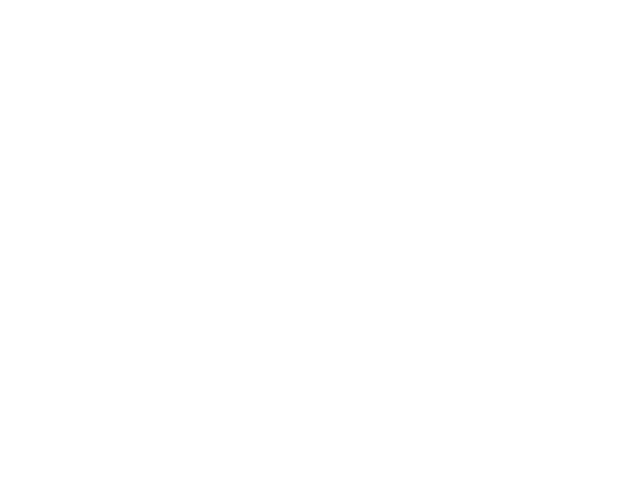

In [7]:
%matplotlib ipympl


def update(frame):
    # plt.clf()
    if frame % 2 == 0:
        # Очищаємо попередні точки
        plt.clf()

        # Створюємо поточну точку
        plt.scatter(
            x_values[frame],
            y_values[frame],
            s=50,
            c=t_values[frame],
            cmap="viridis",
        )

        plt.scatter(0, 0, s=100, c="orange")

    plt.gca().set_xlim([-1.1, 0.6])
    plt.gca().set_ylim([-0.8, 0.8])


animation = FuncAnimation(
    plt.gcf(), update, frames=len(t_values), interval=10, repeat=False
)

plt.show()